# Black Friday Sales Prediction

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/FDS/train.csv'


Mounted at /content/drive


## Reading Data From Training Set

In [3]:
data = pd.read_csv(p1)
dataset = data[['User_ID','Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Analysis & Visualization

### Purchase

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Amount spent in purchase')

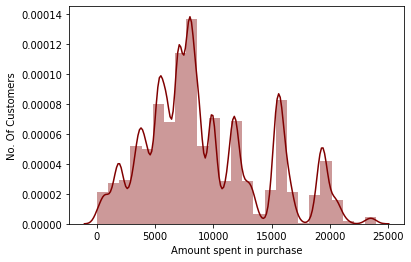

In [4]:
sns.distplot(dataset['Purchase'],color='maroon',bins=25)
plt.ylabel('No. Of Customers')
plt.xlabel("Amount spent in purchase")

In [5]:
print('Skewness of data is :',dataset['Purchase'].skew())
print('Kurtosis of data is :',dataset['Purchase'].kurtosis())

Skewness of data is : 0.6001400037087128
Kurtosis of data is : -0.3383775655851702


#### Univariate analysis of target variarble ( Purchase ) shows Gaussian distribution with skewness of 0.56 and kurtosis of -0.42 which is pretty good.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


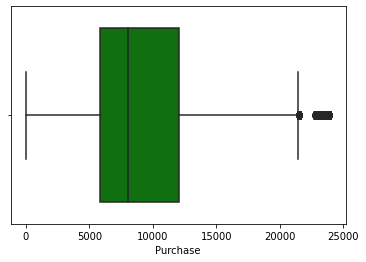

In [6]:
sns.boxplot(dataset['Purchase'],color='green')

#### Box Plot of target variable shows presence of outliers which need to be removed from the data.

### Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


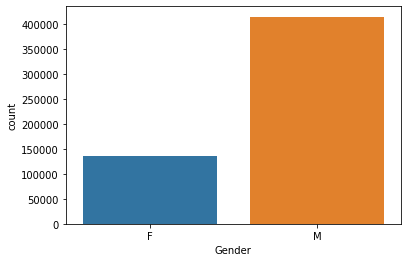

In [7]:
sns.countplot(dataset['Gender'])

#### It can be seen from data that male buyers are relatively more.

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


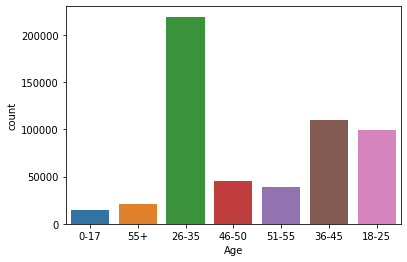

In [8]:
sns.countplot(dataset['Age'])

#### As expected, most purchases are made by people between 18 to 45 years old.

### City Category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


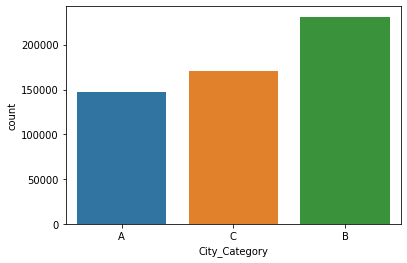

In [9]:
sns.countplot(dataset['City_Category'])

#### City B has relatively more buyers than A & C

### Marital Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


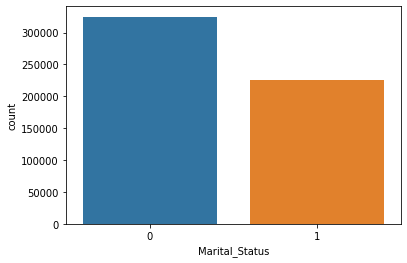

In [10]:
sns.countplot(dataset['Marital_Status'])

#### Unmarried buyers are relatively greater.

### Stay In Current City Years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


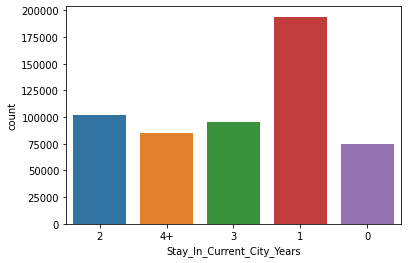

In [11]:
sns.countplot(dataset['Stay_In_Current_City_Years'])

#### People staying in city for year are more keen to buy the product.

### Occupation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


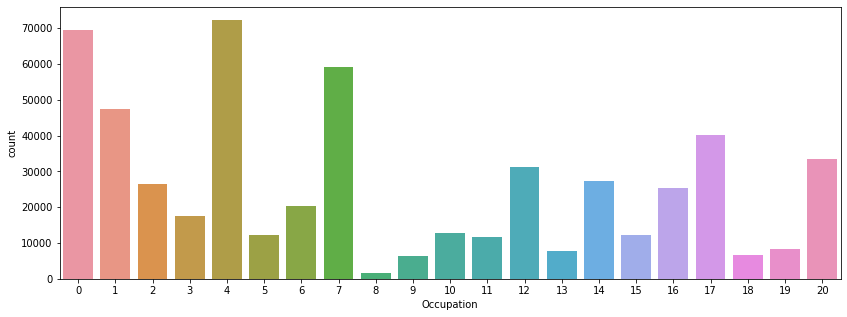

In [12]:
plt.figure(figsize=(14,5))
sns.countplot(dataset['Occupation'])

<ul>
    <li>
        Among all occupations the major concentration lies in 0, 4 & 7</li>
    <li>There are very few buyers having occupation 8</li>
<ul>

## Handling Categorical Values

### OneHotEncoding

In [13]:
gen_onehot_features = pd.get_dummies(dataset['Gender'])
dataset = pd.concat([dataset[['User_ID','Product_ID','Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']],pd.DataFrame(gen_onehot_features)],axis=1)
gen_onehot_features.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
gen_onehot_features_city = pd.get_dummies(dataset['City_Category'])
dataset = pd.concat([dataset[['User_ID','Product_ID','Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase','M','F']],pd.DataFrame(gen_onehot_features_city)],axis=1)
gen_onehot_features_city.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [15]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0-17,10,2,0,3,NaN,NaN,8370,0,1,1,0,0
1,1000001,P00248942,0-17,10,2,0,1,6.0,14.0,15200,0,1,1,0,0
2,1000001,P00087842,0-17,10,2,0,12,NaN,NaN,1422,0,1,1,0,0
3,1000001,P00085442,0-17,10,2,0,12,14.0,NaN,1057,0,1,1,0,0
4,1000002,P00285442,55+,16,4+,0,8,NaN,NaN,7969,1,0,0,0,1


### Missing Values

In [16]:
dataset.isnull()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [17]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(999)
dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(999)
dataset['Product_Category_2'] = dataset['Product_Category_2'].astype(int)
dataset['Product_Category_3'] = dataset['Product_Category_3'].astype(int)

In [18]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0-17,10,2,0,3,999,999,8370,0,1,1,0,0
1,1000001,P00248942,0-17,10,2,0,1,6,14,15200,0,1,1,0,0
2,1000001,P00087842,0-17,10,2,0,12,999,999,1422,0,1,1,0,0
3,1000001,P00085442,0-17,10,2,0,12,14,999,1057,0,1,1,0,0
4,1000002,P00285442,55+,16,4+,0,8,999,999,7969,1,0,0,0,1


### Mapping Ordered Data

In [19]:
gen_ord_map = {'0-17': 0, '18-25': 1, '26-35': 2, 
               '36-45': 3, '46-50': 4, '51-55': 5,'55+':6}
dataset['Age'] = dataset['Age'].map(gen_ord_map)
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,1000001,P00069042,0,10,2,0,3,999,999,8370,0,1,1,0,0
1,1000001,P00248942,0,10,2,0,1,6,14,15200,0,1,1,0,0
2,1000001,P00087842,0,10,2,0,12,999,999,1422,0,1,1,0,0
3,1000001,P00085442,0,10,2,0,12,14,999,1057,0,1,1,0,0
4,1000002,P00285442,6,16,4+,0,8,999,999,7969,1,0,0,0,1


### LabelEncoding

In [20]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(dataset['Stay_In_Current_City_Years'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dataset['Stay_In_Current_City_Years'] = genre_labels

In [21]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(dataset['User_ID'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
dataset['User_ID'] = genre_labels

In [22]:
dataset.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,F,A,B,C
0,0,P00069042,0,10,2,0,3,999,999,8370,0,1,1,0,0
1,0,P00248942,0,10,2,0,1,6,14,15200,0,1,1,0,0
2,0,P00087842,0,10,2,0,12,999,999,1422,0,1,1,0,0
3,0,P00085442,0,10,2,0,12,14,999,1057,0,1,1,0,0
4,1,P00285442,6,16,4,0,8,999,999,7969,1,0,0,0,1


## Removing Outliers

In [23]:
from scipy import stats
z = np.abs(stats.zscore(dataset['Purchase']))

threshold = 2.33
np.where(z > 2.33)

dataset = dataset[(z<2.33)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


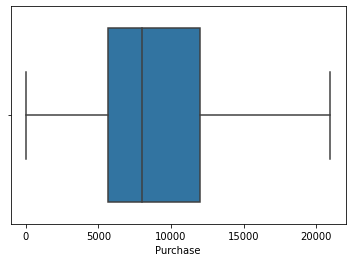

In [24]:
sns.boxplot(dataset['Purchase'])

## Splitting Data

In [25]:
X = dataset[['User_ID','Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'M', 'A', 'B']] 

y = dataset['Purchase'] 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,A,B
145866,4360,3,1,3,0,5,8,12,1,0,1
384998,5123,2,16,4,1,8,999,999,1,0,1
192131,5539,1,0,2,0,5,14,999,1,0,1
36687,5505,1,1,2,0,8,15,999,1,0,0
127181,1562,4,1,2,1,8,17,999,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
362234,1700,2,2,1,1,8,999,999,1,0,1
153330,5549,2,7,1,0,8,999,999,0,0,0
118740,309,6,1,3,1,13,16,999,0,1,0
438792,1511,1,4,3,1,12,14,999,1,1,0


## Training Model

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Intercept:",regressor.intercept_)
print("\nSlope:",regressor.coef_)

y_pred = regressor.predict(X_test)

acc = regressor.score(X_train,y_train)*100


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accurarcy :",acc)

Intercept: 12256.106468607539

Slope: [ 1.47377173e-02  1.03841692e+02  5.10609694e+00  1.15122541e+01
 -5.44952765e+01 -3.58923944e+02 -3.29124814e-01 -1.98379569e+00
  4.53149844e+02 -5.84376688e+02 -4.62667210e+02]
Mean Absolute Error: 3395.952104107962
Mean Squared Error: 19756784.472879212
Root Mean Squared Error: 4444.860455951257
Accurarcy : 18.30313559851082


### XGBoost

In [28]:
%%time
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 10, alpha = 15, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2026.9246914614296
Mean Squared Error: 7451004.127764879
Root Mean Squared Error: 2729.6527485680076
CPU times: user 6min 19s, sys: 800 ms, total: 6min 20s
Wall time: 6min 23s


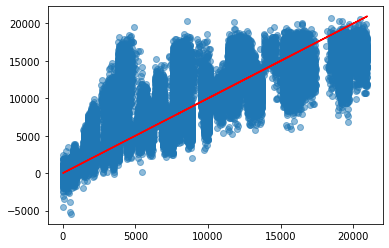

In [29]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot(y_test,y_test,color='red')

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=70, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
acc = regressor.score(X_test,y_test)*100

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accurarcy :",acc)

Mean Absolute Error: 2137.5609636676877
Mean Squared Error: 8681320.965266233
Root Mean Squared Error: 2946.408146415943
Accurarcy : 64.13603497248613



<h2> CONCLUSION </h2>
<p>
<b>We tried 3 models on the same regression problem:- </b>
<ul>
<li>Random forest regressor gives an RMSE of 2900.</li>
<li> Linear regression gives an RMSE of 4444.</li>
 <li>XGBoost gives an RMSE of 2729.</li>
</ul>
<br>
 <b>Out of the 3 models XGBoost gives the lowest RMSE.
 Hence we  will use that model.<b>
    </p>